In [3]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd

import re

In [16]:
# Now load in the stack 
# directory_path = '../data/nexus/LPR_Tl208_Ports/PORT_1a/'
# directory_path = '/Users/mistryk2/Packages/nexus/'
directory_path = '../config/'

# filename="ATPC_gamma.h5"
filename="ATPC_0nubb.h5"

# ddf = dd.read_hdf(os.path.join(directory_path, '*.h5'), key = 'MC/particles')
ddf = dd.read_hdf(os.path.join(directory_path, filename), key = 'MC/hits')
hits = ddf.compute()

# Make sure hits are in the gas volume
hits = hits[hits.label == "GAS"]

# ddf = dd.read_hdf(os.path.join(directory_path, '*.h5'), key = 'MC/particles')
ddf = dd.read_hdf(os.path.join(directory_path, filename), key = 'MC/configuration')
config = ddf.compute()

display(config)

display(hits)

,param_key,param_value
0,event_type,other
1,num_events,1000000
2,saved_events,3329
3,interacting_events,134739
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,ATPC


,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,1617.971558,479.604279,18.428768,1.035080,0.000023,GAS,1,0
1,0,1617.971436,479.604187,18.428749,1.035109,0.000047,GAS,3,0
2,0,1621.171387,482.807556,19.853474,1.051174,0.002468,GAS,2,0
3,0,1639.962158,490.241577,23.104776,1.120574,0.009524,GAS,2,1
4,0,1657.922729,491.038330,23.103683,1.181543,0.008766,GAS,2,2
...,...,...,...,...,...,...,...,...,...
748488,3328,-2.593958,-1396.612549,-362.341095,2.486652,0.000426,GAS,22,1
748489,3328,-2.599773,-1396.610962,-362.340424,2.486967,0.000251,GAS,22,2
748490,3328,-2.596860,-1396.608521,-362.337982,2.487233,0.000117,GAS,22,3
748491,3328,-2.597816,-1396.607788,-362.334351,2.487478,0.000040,GAS,22,4


In [17]:
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

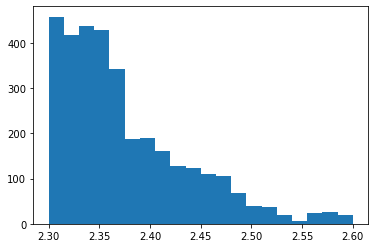

In [18]:
plt.figure()
plt.hist(hit_tot_energy.hit_tot_energy, bins = 20);

In [60]:
# ddf = dd.read_hdf(os.path.join("./", 'ATPC_gamma_smear.h5'), key = 'hits')
ddf = dd.read_hdf(os.path.join("./", 'ATPC_0nubb_smear.h5'), key = 'hits')
hits = ddf.compute()
display(hits)

event_hits = hits[hits.event_id == 9820]

,event_id,x,y,z,energy
0,9820,335.0,1305.0,1585.0,0.000025
1,9820,335.0,1315.0,1585.0,0.000200
2,9820,345.0,1305.0,1585.0,0.000250
3,9820,345.0,1315.0,1585.0,0.000375
4,9820,355.0,1315.0,1585.0,0.000175
...,...,...,...,...,...
2206,9820,245.0,2015.0,2465.0,0.000025
2207,9820,175.0,1985.0,2475.0,0.000025
2208,9820,195.0,1995.0,2475.0,0.000025
2209,9820,215.0,2005.0,2475.0,0.000050


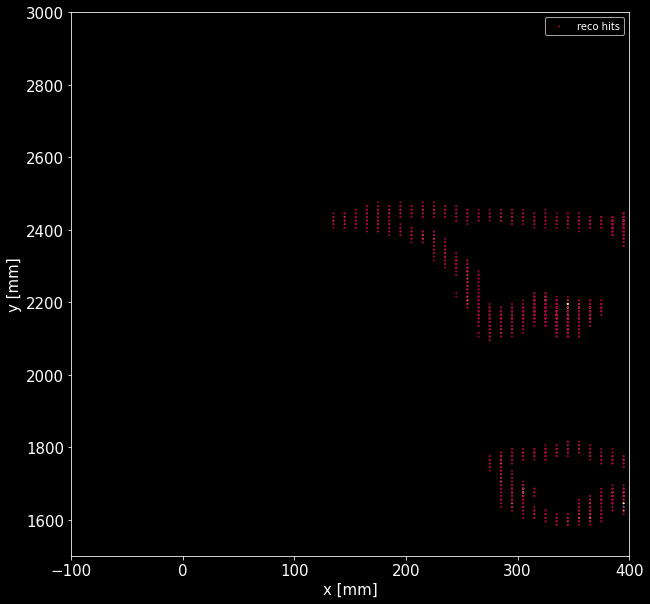

In [61]:
%matplotlib inline



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111)

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
# ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
ax.set_ylim(1500, 3000)

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

In [62]:
%matplotlib widget



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
ax.set_zlim(1500, 3000)


legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyError: 'default'

KeyError: 'default'

KeyError: 'default'

KeyError: 'default'